# set up

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# results="/home/c/dkorot/AI4GOOD/provided_dir/student/dkorot/results/few_shot/2025_11_10/few_shot_table_all_backbones.csv"
results="/home/c/dkorot/AI4GOOD/ai4good-mushroom/results/few_shot_table_all_backbones.csv"
df = pd.read_csv(results)


no_prompt_results_linear = {
"shots": [0, 1, 5, 10, 20],
"top1": [0.17375432304342256, 0.14794415268348918, 0.4118099141795824, 0.4759190470090944, 0.5701934161649801],
"top5": [0.3398872806455745, 0.3710772383758166, 0.7059049570897912, 0.7857051364160369, 0.8471884206481363],
"balanced_acc": [0.11135393210618887, 0.15693212241062424, 0.3783356767488163, 0.4684481591264947, 0.555312425235222],
"macro_f1": [0.08306181843795245, 0.1292491582531643, 0.3495973688573753, 0.42815230324569564, 0.5181250407800437]}

no_prompt_results_prompt = {
"shots": [0, 1, 5, 10, 20],
"top1": [0.17375432304342256, 0.12290252337645703, 0.3493019085436147, 0.3856154732931984, 0.46407070577686693],
"top5": [0.3398872806455745, 0.3021006788779301, 0.6398104265402843, 0.6893172793646727, 0.751953375176124],
"balanced_acc": [0.11135393210618887, 0.13618880148149493, 0.3103226373911458, 0.3750403797601285, 0.44167451571645827],
"macro_f1": [0.08306181843795245, 0.11428868692647248, 0.2876809967708631, 0.34099436563777863, 0.40388063876282854]}

no_prompt_results = {"prototype": no_prompt_results_prompt, "linear": no_prompt_results_linear}

In [17]:
# {splits:
#       {backbones:
#             {shots: 
#                   {models:
#                        {accuracy_types: value}}}}
splits = ['val', 'test']
backbones = ['PE-Core-bigG-14', 'ViT-B-32', 'ViT-B-16', 'ViT-L-14', 'ViT-gopt-16', 'ViT-H-14']
shots = [0, 1, 5, 10, 20, 50, 100]
models = ['prototype', 'linear']  # model types
accuracy_types = ['top1', 'top5', 'balanced_acc', 'macro_f1']  # accuracy metrics

results_dict = {}

for acc_type in accuracy_types:
    results_dict[acc_type] = {}
    for split in splits:
        results_dict[acc_type][split] = {}
        for backbone in backbones:
            results_dict[acc_type][split][backbone] = {}
            for shot in shots:
                results_dict[acc_type][split][backbone][shot] = {}
                for model in models:
                    results_dict[acc_type][split][backbone][shot][model] = {}
                    
                    rows = df[
                        (df["split"] == split) &
                        (df['backbone'].str.contains(backbone)) &
                        (df["shot"] == shot) &
                        df["model"].str.startswith(model) | (df["model"] == "zero-shot")
                    ]

                    idx = rows[acc_type].idxmax()
                    best_row = rows.loc[idx]

                    results_dict[acc_type][split][backbone][shot][model] = {
                        "best_alpha": float(best_row["alpha"]),
                        "best_value": float(best_row[acc_type]),
                    }

print(results_dict)


{'top1': {'val': {'PE-Core-bigG-14': {0: {'prototype': {'best_alpha': 0.0, 'best_value': 0.5354123975409836}, 'linear': {'best_alpha': 0.0, 'best_value': 0.5354123975409836}}, 1: {'prototype': {'best_alpha': 0.2, 'best_value': 0.6111680327868853}, 'linear': {'best_alpha': 0.0, 'best_value': 0.5354123975409836}}, 5: {'prototype': {'best_alpha': 0.4, 'best_value': 0.7288678278688525}, 'linear': {'best_alpha': 0.6, 'best_value': 0.6875640368852459}}, 10: {'prototype': {'best_alpha': 0.6, 'best_value': 0.7688268442622951}, 'linear': {'best_alpha': 0.8, 'best_value': 0.7599897540983607}}, 20: {'prototype': {'best_alpha': 0.6, 'best_value': 0.7906634221311475}, 'linear': {'best_alpha': 0.8, 'best_value': 0.7966828893442623}}, 50: {'prototype': {'best_alpha': 0.6, 'best_value': 0.8085297131147541}, 'linear': {'best_alpha': 0.8, 'best_value': 0.8428534836065574}}, 100: {'prototype': {'best_alpha': 0.6, 'best_value': 0.8177510245901639}, 'linear': {'best_alpha': 0.5, 'best_value': 0.86360143442

In [ ]:

# Example lists for looping
backbones = ['PE-Core-bigG-14', 'ViT-B-32', 'ViT-B-16', 'ViT-L-14', 'ViT-gopt-16', 'ViT-H-14']
splits = ['val', 'test']
models = ['prototype', 'linear']  # model types
accuracy_types = ['top1', 'top5', 'balanced_acc', 'macro_f1']  # accuracy metrics

               
for split in splits:
    for backbone in backbones:
        for model in models:
            for accuracy_type in accuracy_types:
                # Filter dataframe
                plot_df = df[
                    (df['split'] == split) &
                    (df['model'].str.contains(model, regex=False)) &
                    (df['backbone'].str.contains(backbone))
                ]
                if plot_df.empty:
                    continue  # skip if no data for this config

                print(plot_df)

                # Plot
                plt.figure(figsize=(10,6))
                sns.lineplot(
                    data=plot_df,
                    x='shot',
                    y=accuracy_type,
                    hue='alpha',
                    markers=True,
                    dashes=False,
                    palette="viridis"
                )

                # plot baseline
                zeroShot_value = df.loc[(df["model"] == "zero-shot") & (df["split"] == split) & (df["backbone"].str.contains(backbone, case=False, na=False)), accuracy_type].values
                # plt.plot([0], [zeroShot_value], marker='x', linestyle='--', color='red', label='zero_shot with prompt')
                plt.plot(no_prompt_results[model]["shots"], no_prompt_results[model][accuracy_type], marker='x', linestyle='--', color='black', label='baseline B-32 no-prompt')

                plt.xscale('log')
                plt.xlim(-5, 105)

                plt.title(f"{backbone} {model}: {accuracy_type} Accuracy vs Shots ({split})")
                plt.ylabel(f"{accuracy_type} Accuracy")
                plt.xlabel("Shots")
                plt.legend(title="Alpha", bbox_to_anchor=(1.05, 1), loc='upper left')
                plt.tight_layout()
                plt.show()



# plot

     shot                          model  alpha split             backbone  \
2       1                      prototype    0.5   val  PE-Core-bigG-14-448   
4       1  prototype+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
6       1  prototype+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
8       1  prototype+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
10      1  prototype+prompts(alpha=0.60)    0.6   val  PE-Core-bigG-14-448   
12      1  prototype+prompts(alpha=0.80)    0.8   val  PE-Core-bigG-14-448   
14      1  prototype+prompts(alpha=1.00)    1.0   val  PE-Core-bigG-14-448   
30      5                      prototype    0.5   val  PE-Core-bigG-14-448   
32      5  prototype+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
34      5  prototype+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
36      5  prototype+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
38      5  prototype+prompts(alpha=0.60)    0.6   val  PE-Core-b

/tmp/ipykernel_2737986/1971709229.py:45: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(-5, 105)


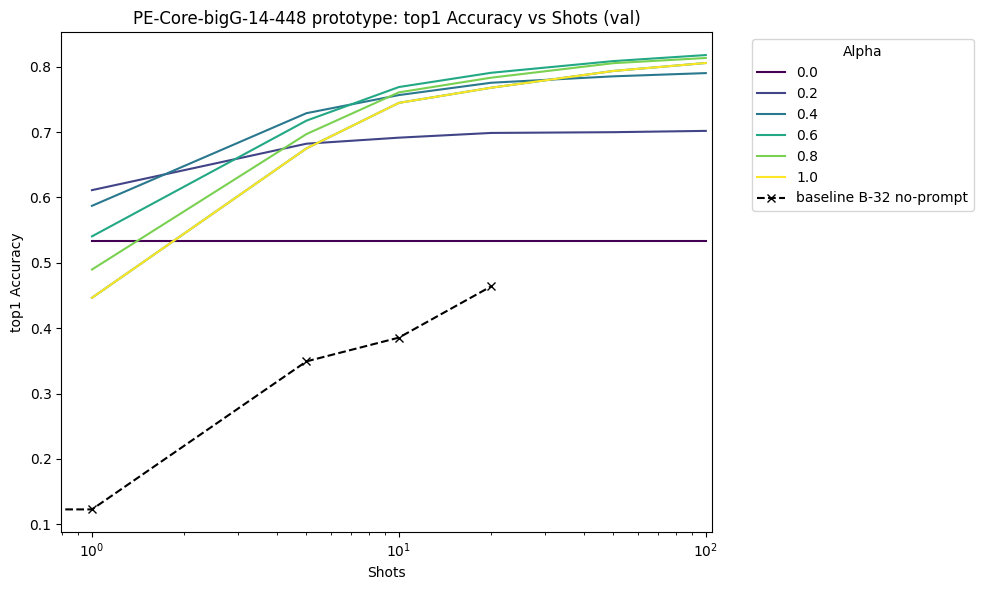

     shot                          model  alpha split             backbone  \
2       1                      prototype    0.5   val  PE-Core-bigG-14-448   
4       1  prototype+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
6       1  prototype+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
8       1  prototype+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
10      1  prototype+prompts(alpha=0.60)    0.6   val  PE-Core-bigG-14-448   
12      1  prototype+prompts(alpha=0.80)    0.8   val  PE-Core-bigG-14-448   
14      1  prototype+prompts(alpha=1.00)    1.0   val  PE-Core-bigG-14-448   
30      5                      prototype    0.5   val  PE-Core-bigG-14-448   
32      5  prototype+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
34      5  prototype+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
36      5  prototype+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
38      5  prototype+prompts(alpha=0.60)    0.6   val  PE-Core-b

/tmp/ipykernel_2737986/1971709229.py:45: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(-5, 105)


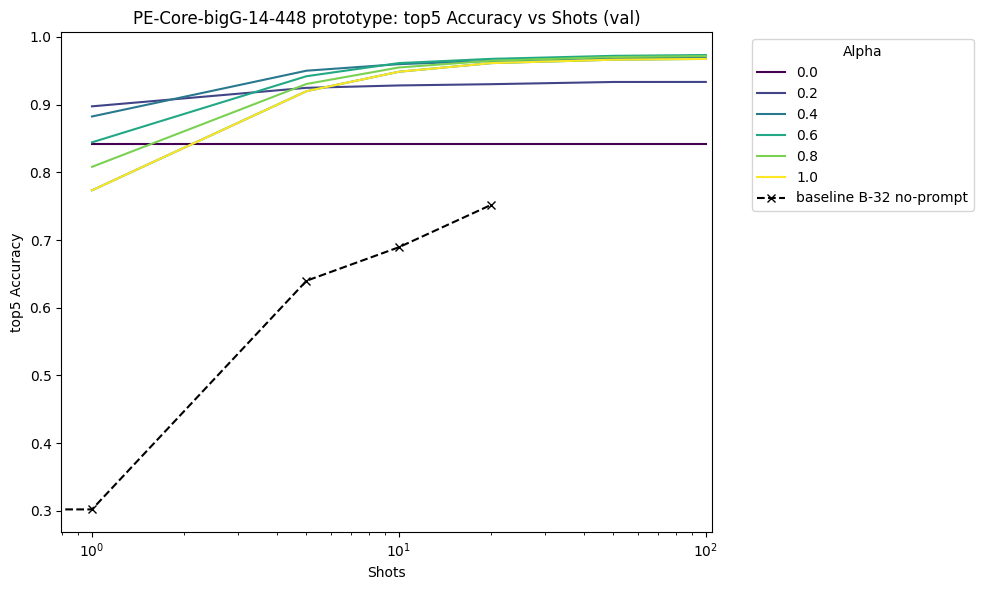

     shot                          model  alpha split             backbone  \
2       1                      prototype    0.5   val  PE-Core-bigG-14-448   
4       1  prototype+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
6       1  prototype+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
8       1  prototype+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
10      1  prototype+prompts(alpha=0.60)    0.6   val  PE-Core-bigG-14-448   
12      1  prototype+prompts(alpha=0.80)    0.8   val  PE-Core-bigG-14-448   
14      1  prototype+prompts(alpha=1.00)    1.0   val  PE-Core-bigG-14-448   
30      5                      prototype    0.5   val  PE-Core-bigG-14-448   
32      5  prototype+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
34      5  prototype+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
36      5  prototype+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
38      5  prototype+prompts(alpha=0.60)    0.6   val  PE-Core-b

/tmp/ipykernel_2737986/1971709229.py:45: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(-5, 105)


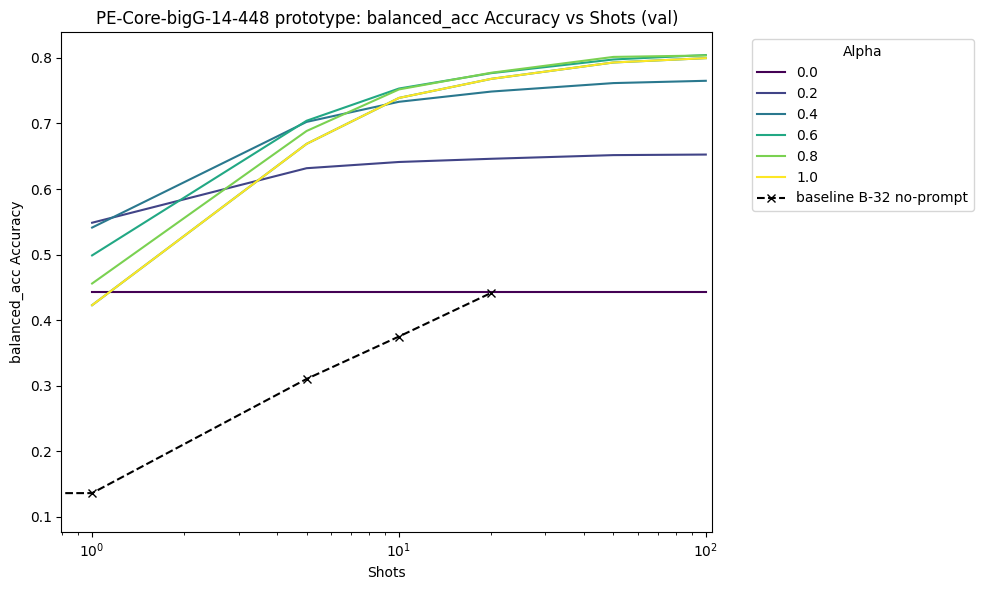

     shot                          model  alpha split             backbone  \
2       1                      prototype    0.5   val  PE-Core-bigG-14-448   
4       1  prototype+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
6       1  prototype+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
8       1  prototype+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
10      1  prototype+prompts(alpha=0.60)    0.6   val  PE-Core-bigG-14-448   
12      1  prototype+prompts(alpha=0.80)    0.8   val  PE-Core-bigG-14-448   
14      1  prototype+prompts(alpha=1.00)    1.0   val  PE-Core-bigG-14-448   
30      5                      prototype    0.5   val  PE-Core-bigG-14-448   
32      5  prototype+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
34      5  prototype+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
36      5  prototype+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
38      5  prototype+prompts(alpha=0.60)    0.6   val  PE-Core-b

/tmp/ipykernel_2737986/1971709229.py:45: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(-5, 105)


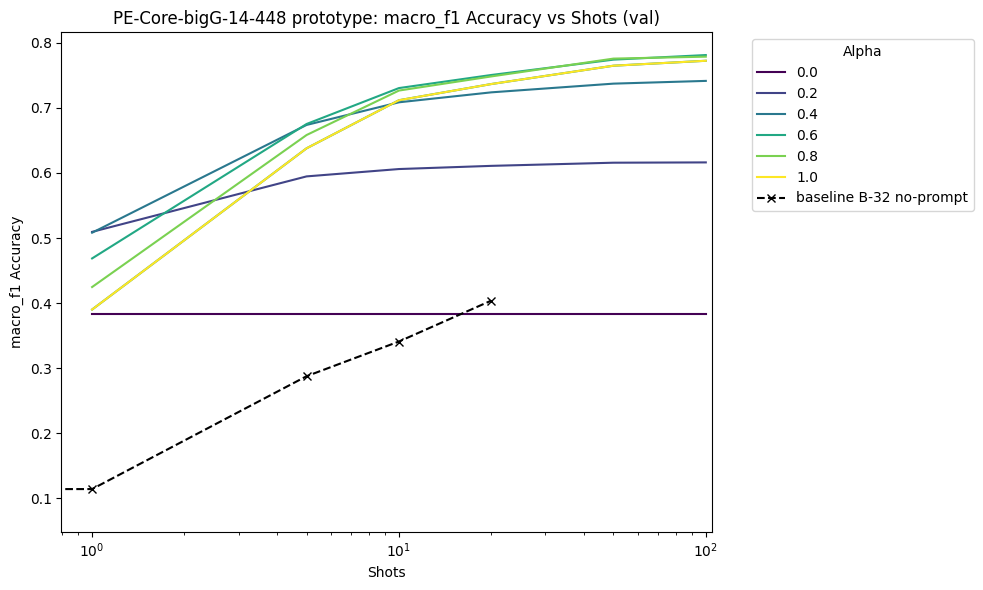

     shot                       model  alpha split             backbone  \
16      1                      linear    0.5   val  PE-Core-bigG-14-448   
18      1  linear+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
20      1  linear+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
22      1  linear+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
24      1  linear+prompts(alpha=0.60)    0.6   val  PE-Core-bigG-14-448   
26      1  linear+prompts(alpha=0.80)    0.8   val  PE-Core-bigG-14-448   
28      1  linear+prompts(alpha=1.00)    1.0   val  PE-Core-bigG-14-448   
44      5                      linear    0.5   val  PE-Core-bigG-14-448   
46      5  linear+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
48      5  linear+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
50      5  linear+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
52      5  linear+prompts(alpha=0.60)    0.6   val  PE-Core-bigG-14-448   
54      5  linear+prompts

/tmp/ipykernel_2737986/1971709229.py:45: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(-5, 105)


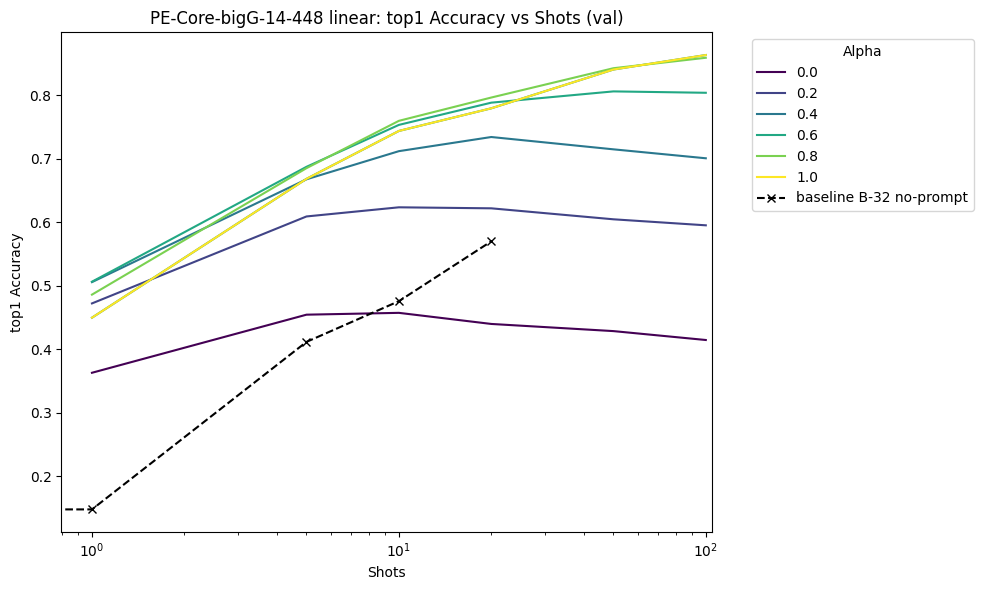

     shot                       model  alpha split             backbone  \
16      1                      linear    0.5   val  PE-Core-bigG-14-448   
18      1  linear+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
20      1  linear+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
22      1  linear+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
24      1  linear+prompts(alpha=0.60)    0.6   val  PE-Core-bigG-14-448   
26      1  linear+prompts(alpha=0.80)    0.8   val  PE-Core-bigG-14-448   
28      1  linear+prompts(alpha=1.00)    1.0   val  PE-Core-bigG-14-448   
44      5                      linear    0.5   val  PE-Core-bigG-14-448   
46      5  linear+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
48      5  linear+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
50      5  linear+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
52      5  linear+prompts(alpha=0.60)    0.6   val  PE-Core-bigG-14-448   
54      5  linear+prompts

/tmp/ipykernel_2737986/1971709229.py:45: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(-5, 105)


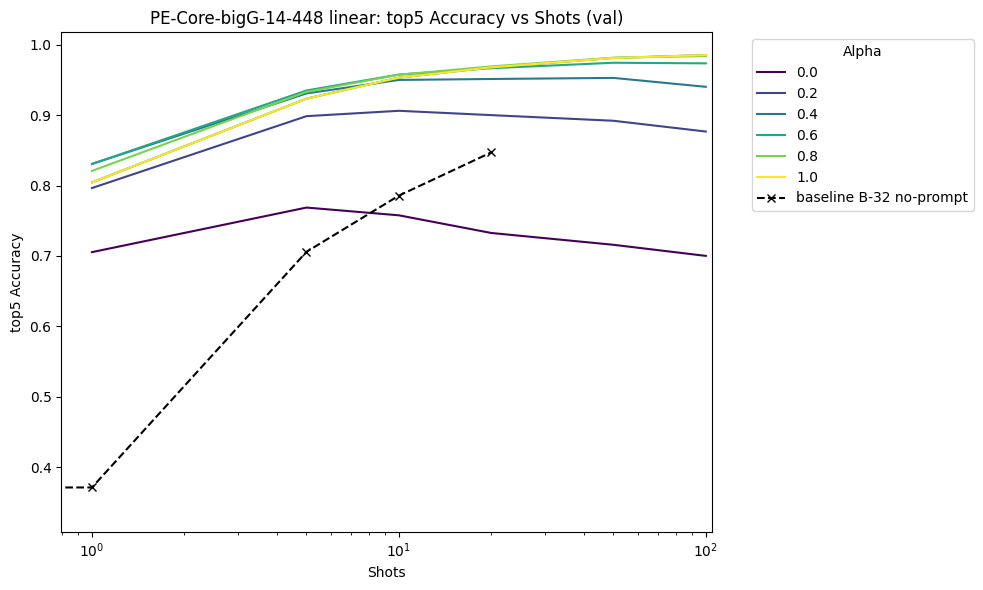

     shot                       model  alpha split             backbone  \
16      1                      linear    0.5   val  PE-Core-bigG-14-448   
18      1  linear+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
20      1  linear+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
22      1  linear+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
24      1  linear+prompts(alpha=0.60)    0.6   val  PE-Core-bigG-14-448   
26      1  linear+prompts(alpha=0.80)    0.8   val  PE-Core-bigG-14-448   
28      1  linear+prompts(alpha=1.00)    1.0   val  PE-Core-bigG-14-448   
44      5                      linear    0.5   val  PE-Core-bigG-14-448   
46      5  linear+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
48      5  linear+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
50      5  linear+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
52      5  linear+prompts(alpha=0.60)    0.6   val  PE-Core-bigG-14-448   
54      5  linear+prompts

/tmp/ipykernel_2737986/1971709229.py:45: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(-5, 105)


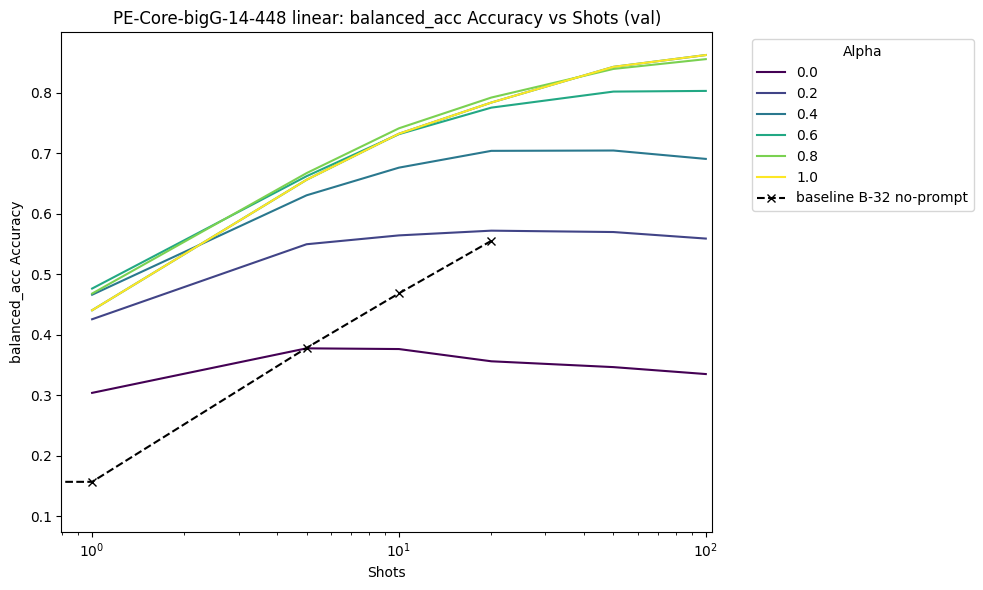

     shot                       model  alpha split             backbone  \
16      1                      linear    0.5   val  PE-Core-bigG-14-448   
18      1  linear+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
20      1  linear+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
22      1  linear+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
24      1  linear+prompts(alpha=0.60)    0.6   val  PE-Core-bigG-14-448   
26      1  linear+prompts(alpha=0.80)    0.8   val  PE-Core-bigG-14-448   
28      1  linear+prompts(alpha=1.00)    1.0   val  PE-Core-bigG-14-448   
44      5                      linear    0.5   val  PE-Core-bigG-14-448   
46      5  linear+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
48      5  linear+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
50      5  linear+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
52      5  linear+prompts(alpha=0.60)    0.6   val  PE-Core-bigG-14-448   
54      5  linear+prompts

/tmp/ipykernel_2737986/1971709229.py:45: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(-5, 105)


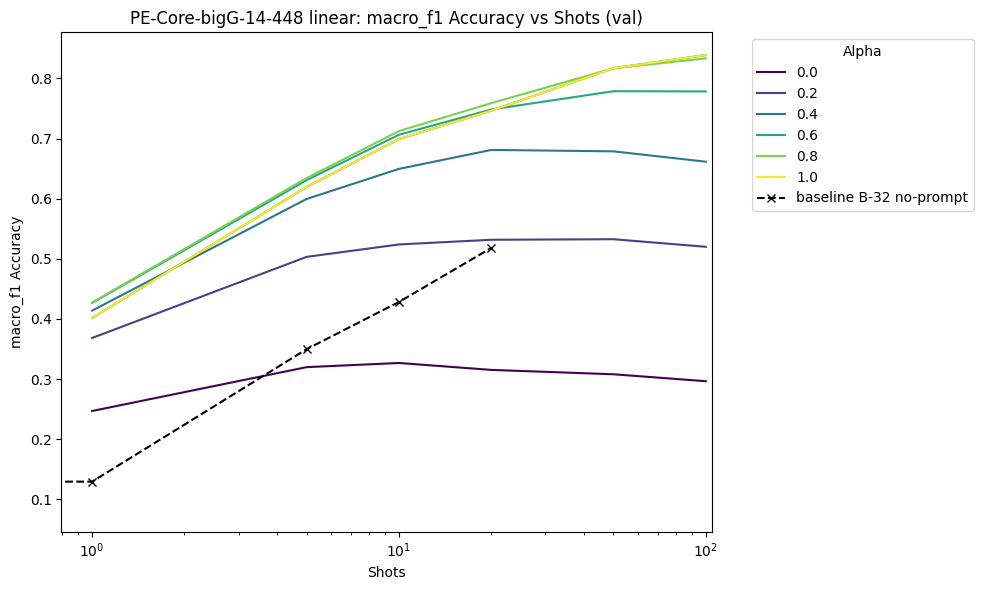

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example lists for looping
splits = ['val'] #, 'test']
models = ['prototype', 'linear']  # model types
backbones = ['PE-Core-bigG-14-448']# ['ViT-B-32', 'ViT-B-16', 'ViT-L-14', 'ViT-gopt-16', 'ViT-H-14']
accuracy_types = ['top1', 'top5', 'balanced_acc', 'macro_f1']  # accuracy metrics

               
for split in splits:
    for backbone in backbones:
        for model in models:
            for accuracy_type in accuracy_types:
                # Filter dataframe
                plot_df = df[
                    (df['split'] == split) &
                    (df['model'].str.contains(model, regex=False)) &
                    (df['backbone'].str.contains(backbone))
                ]
                if plot_df.empty:
                    continue  # skip if no data for this config

                print(plot_df)

                # Plot
                plt.figure(figsize=(10,6))
                sns.lineplot(
                    data=plot_df,
                    x='shot',
                    y=accuracy_type,
                    hue='alpha',
                    markers=True,
                    dashes=False,
                    palette="viridis"
                )

                # plot baseline
                zeroShot_value = df.loc[(df["model"] == "zero-shot") & (df["split"] == split) & (df["backbone"].str.contains(backbone, case=False, na=False)), accuracy_type].values
                # plt.plot([0], [zeroShot_value], marker='x', linestyle='--', color='red', label='zero_shot with prompt')
                plt.plot(no_prompt_results[model]["shots"], no_prompt_results[model][accuracy_type], marker='x', linestyle='--', color='black', label='baseline B-32 no-prompt')

                plt.xscale('log')
                plt.xlim(-5, 105)

                plt.title(f"{backbone} {model}: {accuracy_type} Accuracy vs Shots ({split})")
                plt.ylabel(f"{accuracy_type} Accuracy")
                plt.xlabel("Shots")
                plt.legend(title="Alpha", bbox_to_anchor=(1.05, 1), loc='upper left')
                plt.tight_layout()
                plt.show()

